<a href="https://colab.research.google.com/github/singhsneha99/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import IsolationForest


In [8]:
# Load your dataset
df = pd.read_csv('creditcard_2023.csv')

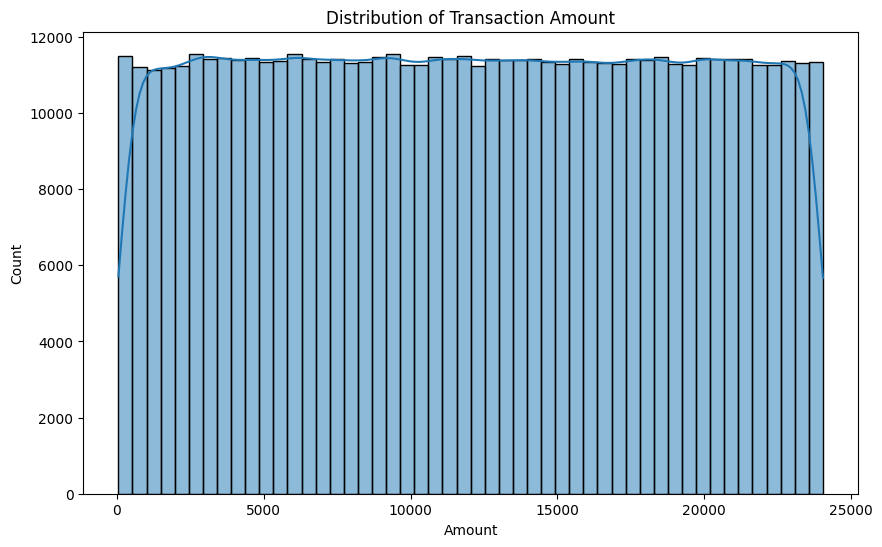

In [9]:
# Visualize the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

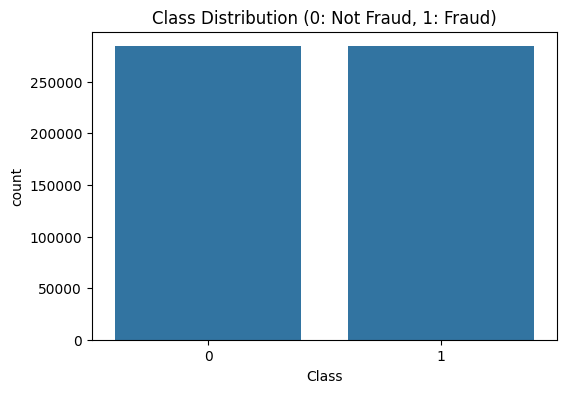

In [10]:
# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()

In [14]:

# Display class distribution before sampling
class_distribution_before = df['Class'].value_counts()
print("Number of entries for class 0 (Not Fraud):", class_distribution_before[0])
print("Number of entries for class 1 (Fraud):", class_distribution_before[1])


Number of entries for class 0 (Not Fraud): 284315
Number of entries for class 1 (Fraud): 284315


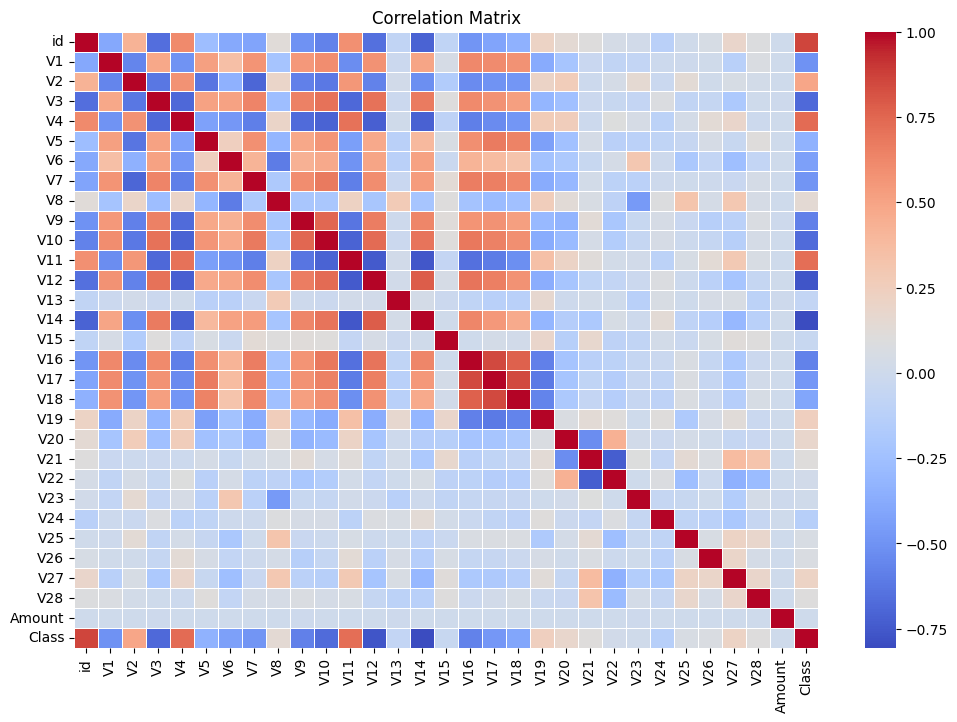

In [11]:

# Visualize correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


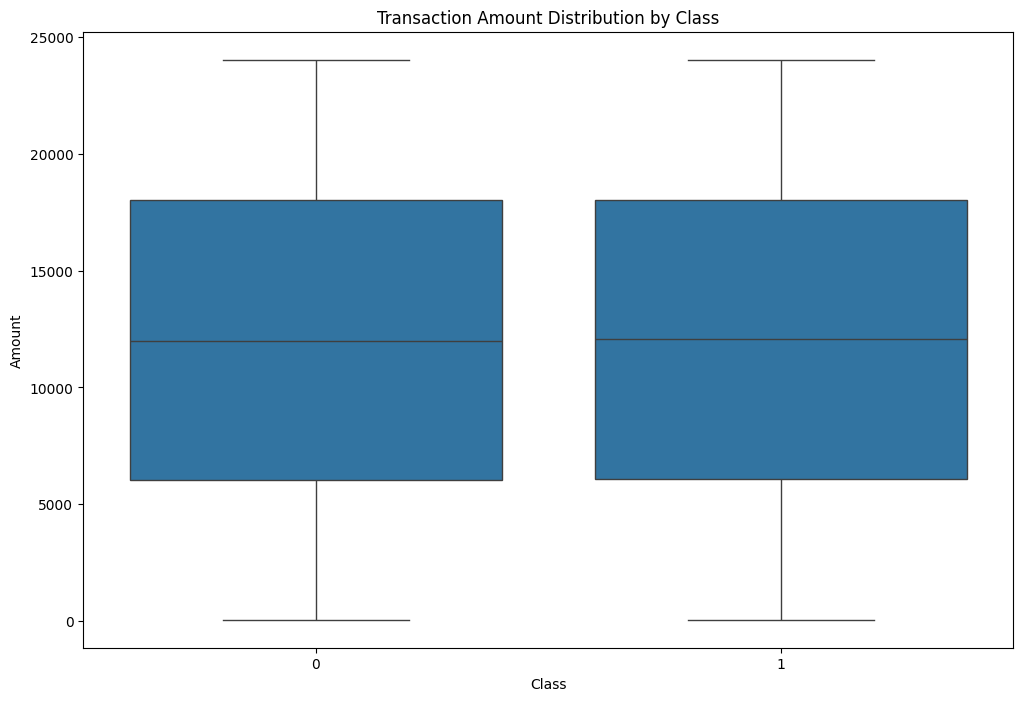

In [12]:

# Identify anomalous patterns or outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Class')
plt.show()


Number of entries for class 0 (Not Fraud) - After Undersampling: 284315
Number of entries for class 1 (Fraud) - After Undersampling: 284315


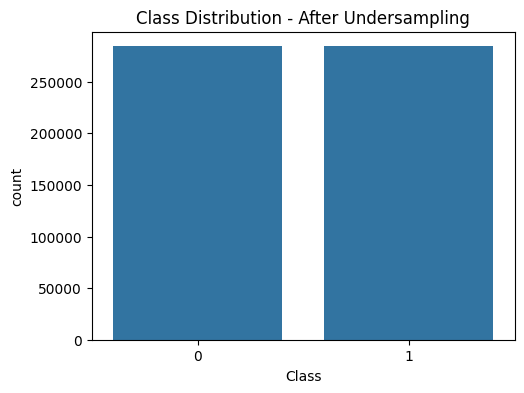

In [17]:

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Oversample the minority class
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Display class distribution after undersampling
class_distribution_after_under = y_under.value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_under)
plt.title('Class Distribution - After Undersampling')
print("\nNumber of entries for class 0 (Not Fraud) - After Undersampling:", class_distribution_after_under[0])
print("Number of entries for class 1 (Fraud) - After Undersampling:", class_distribution_after_under[1])



Number of entries for class 0 (Not Fraud) - After Oversampling: 284315
Number of entries for class 1 (Fraud) - After Oversampling: 284315


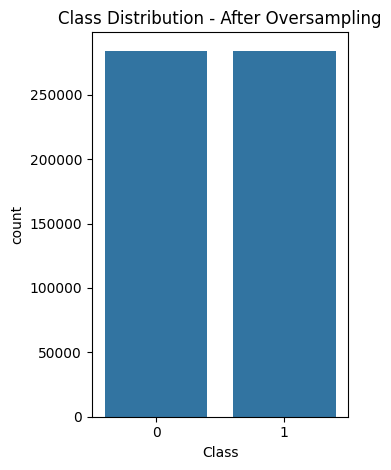

In [18]:

# Display class distribution after oversampling
class_distribution_after_over = y_over.value_counts()

plt.subplot(1, 2, 2)
sns.countplot(x=y_over)
plt.title('Class Distribution - After Oversampling')
print("\nNumber of entries for class 0 (Not Fraud) - After Oversampling:", class_distribution_after_over[0])
print("Number of entries for class 1 (Fraud) - After Oversampling:", class_distribution_after_over[1])

plt.tight_layout()
plt.show()


In [20]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f'AUC-ROC Score: {auc_roc:.4f}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

    # Display confusion matrix and classification report
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(cm)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))




Logistic Regression:
AUC-ROC Score: 0.9065


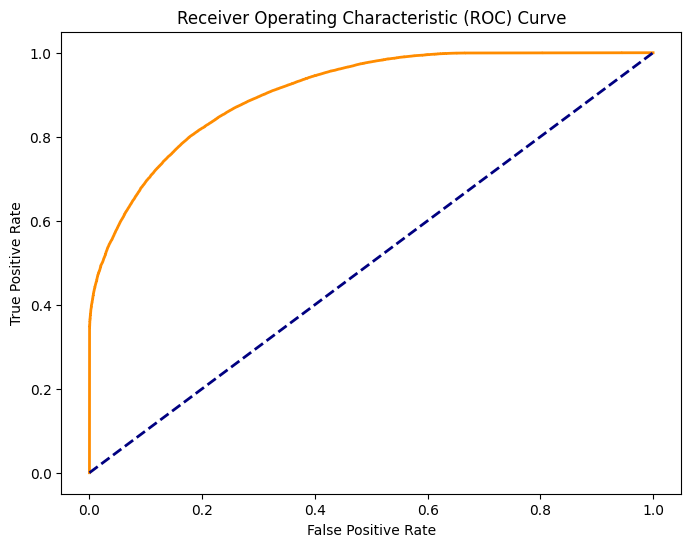


Confusion Matrix:
[[37596 19154]
 [ 4802 52174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     56750
           1       0.73      0.92      0.81     56976

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



In [23]:
# Logistic Regression
print("\nLogistic Regression:")
logistic_regression_model = LogisticRegression(random_state=42)
train_and_evaluate_model(logistic_regression_model, X_train, y_train, X_test, y_test)


Random Forest:
AUC-ROC Score: 1.0000


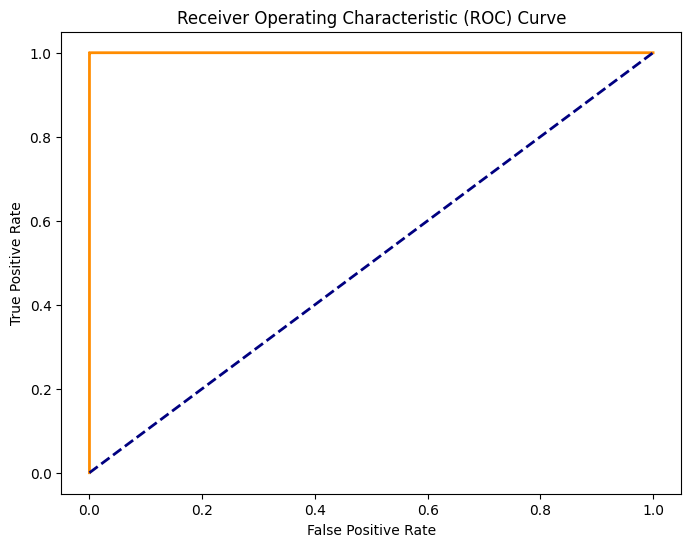


Confusion Matrix:
[[56744     6]
 [   14 56962]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [26]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f'AUC-ROC Score: {auc_roc:.4f}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

    # Display confusion matrix and classification report
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(cm)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

# Random Forest
print("\nRandom Forest:")
random_forest_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)



XGBoost:
AUC-ROC Score: 1.0000


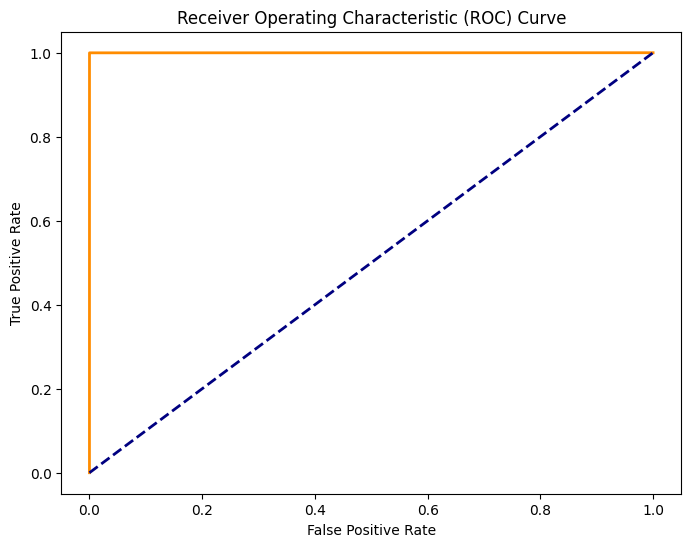


Confusion Matrix:
[[56744     6]
 [   15 56961]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [27]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_prob)
    print(f'AUC-ROC Score: {auc_roc:.4f}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

    # Display confusion matrix and classification report
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(cm)

    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
# XGBoost
print("\nXGBoost:")
xgb_model = XGBClassifier(random_state=42)
train_and_evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

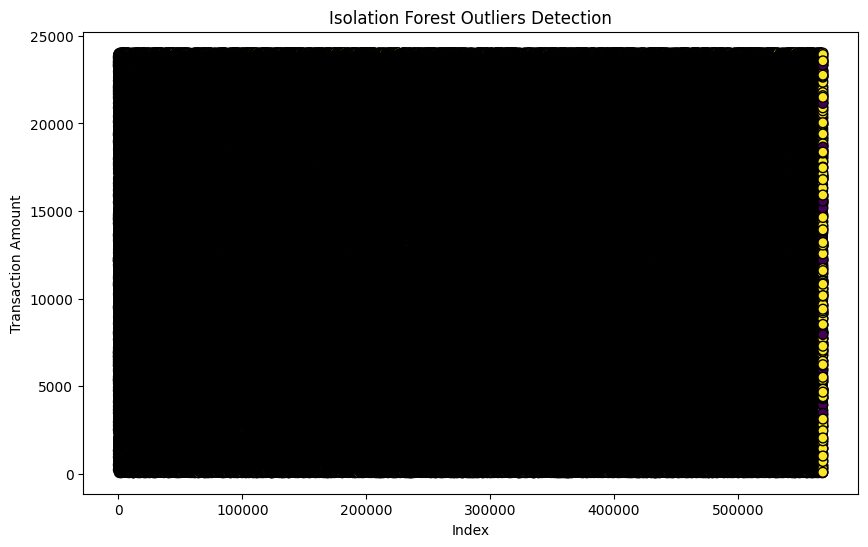


Number of outliers detected: 42493


In [29]:
# Separate features and target variable
X2 = df.drop('Class', axis=1)
y2 = df['Class']

# Isolation Forest
isolation_forest = IsolationForest(contamination='auto', random_state=42)
y_pred_outliers = isolation_forest.fit_predict(X2)

# Add the outlier prediction column to the DataFrame
df['Outlier'] = y_pred_outliers

# Visualize outliers
plt.figure(figsize=(10, 6))

plt.scatter(df.index, df['Amount'], c=df['Outlier'], cmap='viridis', edgecolors='k', marker='o', s=50)
plt.title('Isolation Forest Outliers Detection')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')

plt.show()

# Display the number of outliers detected
num_outliers = df[df['Outlier'] == -1].shape[0]
print(f'\nNumber of outliers detected: {num_outliers}')

In [32]:
# Calculate a simple moving average of 'Amount' for each id over the last N transactions
N = 5  # You can adjust N based on your preference
df['MovingAverageAmount'] = df.groupby('id')['Amount'].rolling(window=N, min_periods=1).mean().reset_index(level=0, drop=True)

# Display the DataFrame with new features
print(df.head())



   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0 -0.130006  0.727159  ... -0.134794  0.165959  0.126280 -0.434824 -0.081230   
1 -0.133118  0.347452  ...  0.079469 -0.577395  0.190090  0.296503 -0.248052   
2 -0.095576 -0.261297  ...  0.945045 -1.154666 -0.605564 -0.312895 -0.300258   
3 -0.065130 -0.205698  ... -0.214048 -1.893131  1.003963 -0.515950 -0.165316   
4 -0.212660  1.049921  ... -0.161666  0.312561 -0.414116  1.071126  0.023712   

        V28    Amount  Class  Outlier  Movin